<a href="https://colab.research.google.com/github/Cherry63/Plotly-assingment-/blob/main/Internal_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
import pkg_resources
pkg_resources.get_distribution("xlrd").version

'1.1.0'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import k_means
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import os



In [5]:
df = pd.read_excel('DataAnalystTask.xls')
df.head(5)

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,2022-08-01 04:55:00,2022-07-31,Direct,3999.0,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,2022-08-01 04:46:00,2022-07-31,Direct,999.0,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,2022-08-01 03:21:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,2022-08-01 00:56:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,2022-08-01 00:46:00,2022-07-31,Direct,2022.0,NaN,INR,NaN


In [6]:
df.shape

(9514, 11)

In [7]:
df.describe()

,Product Amount with GST
count,9513.000000
mean,1464.982533
std,1277.535383
min,4.680000
25%,499.000000
50%,1499.000000
75%,1999.000000
max,29992.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User ID                  9514 non-null   object        
 1   Product Code             9514 non-null   object        
 2   Payment Status           9514 non-null   object        
 3   Coupon code              662 non-null    object        
 4   Lead Registered Time     9514 non-null   datetime64[ns]
 5   Sales Date               9514 non-null   datetime64[ns]
 6   Source                   9514 non-null   object        
 7   Product Amount with GST  9513 non-null   float64       
 8   Payment Mode             1730 non-null   object        
 9   Currency  Code           9514 non-null   object        
 10  Transaction Bank         92 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 817.7+ KB


In [9]:
df.isna().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

In [10]:
df_dropped=df.dropna()
df_dropped

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
869,user1205,Product38,paid,Coupon1,2022-07-25 17:23:00,2022-07-25,Paid,374.0,netbanking,INR,KKBK
2264,user3174,Product91,paid,Coupon1,2022-07-17 00:19:00,2022-07-16,Email,374.0,netbanking,INR,ICIC
3204,user4459,Product1,paid,Coupon1,2022-07-09 23:44:00,2022-07-09,Direct,2999.0,netbanking,INR,SBIN
4543,user5952,Product53,paid,Coupon46,2022-07-03 09:52:00,2022-07-03,Direct,1799.0,netbanking,INR,ICIC
4748,user6130,Product1,paid,Coupon1,2022-07-02 22:28:00,2022-07-02,Email,1874.0,netbanking,INR,ICIC
4795,user6178,Product1,paid,Coupon1,2022-07-02 19:23:00,2022-07-02,Direct,1874.0,netbanking,INR,CIUB
5081,user5305,Product31,paid,Coupon1,2022-07-01 09:05:00,2022-07-01,Paid,1124.0,netbanking,INR,ICIC
5113,user6544,Product1,paid,Coupon1,2022-06-30 22:34:00,2022-06-30,Direct,1874.0,netbanking,INR,HDFC
6218,user5277,Product1,paid,Coupon9,2022-06-25 13:07:00,2022-06-25,Direct,2000.0,netbanking,INR,HDFC
7264,user8616,Product98,paid,Coupon74,2022-06-20 11:32:00,2022-06-20,Direct,449.0,netbanking,INR,CIUB


In [11]:
df.shape

(9514, 11)

In [12]:
df.isna().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

EDA

Text(0.5, 1.0, 'Product Code wise sales')

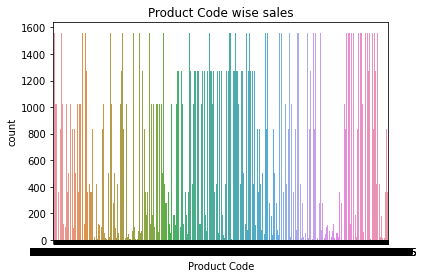

In [13]:
sns.countplot(data=df,x='Product Code',order=df['Product Code'])
plt.title('Product Code wise sales')

Text(0.5, 1.0, 'Product Amount')

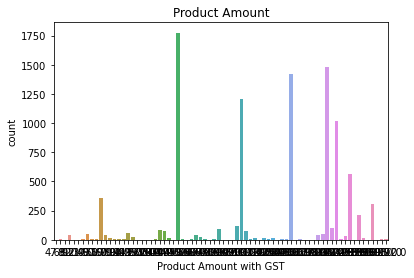

In [14]:
sns.countplot(data=df,x='Product Amount with GST')
plt.title('Product Amount')

Text(0.5, 1.0, 'BANK')

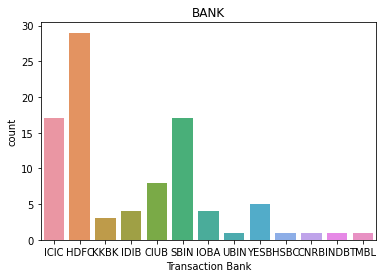

In [15]:
sns.countplot(data=df,x='Transaction Bank')
plt.title('BANK')



Text(0.5, 1.0, 'Type of Payment')

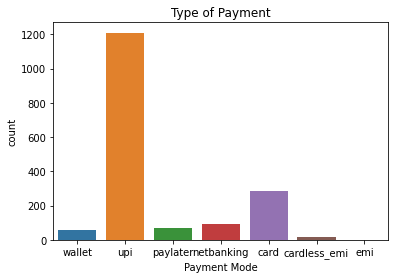

In [16]:
sns.countplot(data=df,x='Payment Mode')
plt.title('Type of Payment')

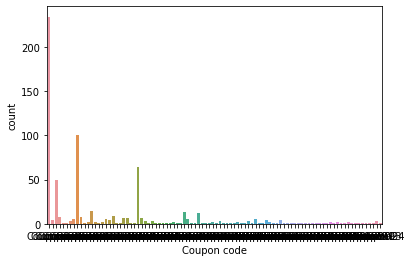

<Figure size 360x576 with 0 Axes>

In [17]:
sns.countplot(data=df,x='Coupon code')
fig = plt.figure(figsize=(5,8))


Text(0.5, 1.0, 'Source')

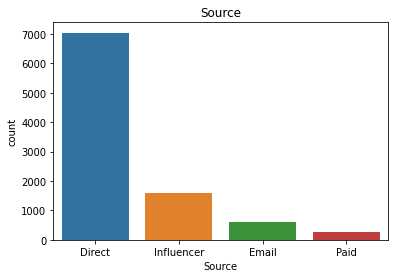

In [18]:
sns.countplot(data=df,x='Source')
plt.title('Source')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cost')

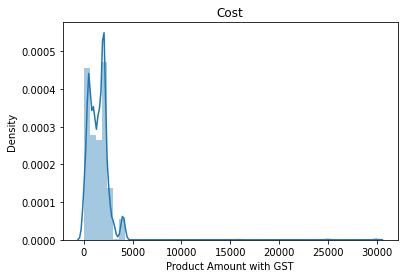

In [19]:
sns.distplot(df['Product Amount with GST'])
plt.title('Cost')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


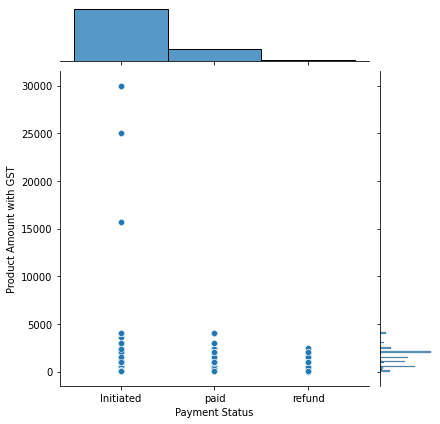

In [20]:
sns.jointplot(df['Payment Status'], df['Product Amount with GST'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


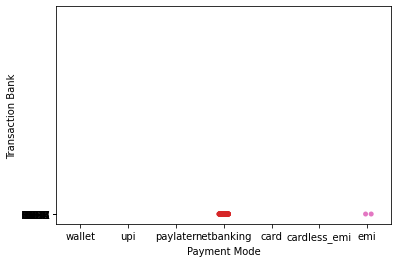

In [21]:
sns.stripplot(df['Payment Mode'], df['Transaction Bank'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


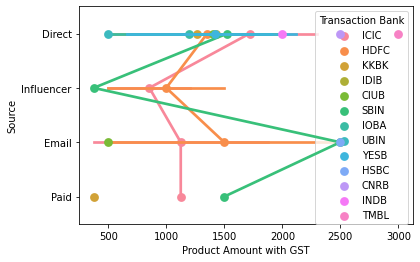

In [22]:
sns.pointplot(df['Product Amount with GST'], df['Source'], hue=df['Transaction Bank'])
